In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('PysparkExamples').getOrCreate()
spark


In [2]:
from pyspark.sql.functions import col, to_date

df = spark.sparkContext.parallelize([["20210101"], ["20220101"]]).toDF(
    ["date_col"]
)
df = df.withColumn("date_col", to_date(col("date_col"), "yyyyddMM"))

df.show(3, False)

+----------+
|date_col  |
+----------+
|2021-01-01|
|2022-01-01|
+----------+



In [8]:
import inspect
from pyspark.sql import SparkSession

from pyspark.sql.functions import *

import networkx as nx
import matplotlib.pyplot as plt



In [3]:
def plot_directed_graph(gf):
    gplot = nx.DiGraph()
    edge_labels = {}

    plt.figure(figsize=(6, 7))
    for node in gf.vertices.select('id').take(1000):
        gplot.add_node(node['id'])

    for row in gf.edges.select('src', 'dst', 'delay').take(1000):
        gplot.add_edge(row['src'], row['dst'])
        edge_labels[(row['src'], row['dst'])] = row['delay']

    pos = nx.shell_layout(gplot)

    nx.draw(gplot,
            pos,
            with_labels=True,
            font_weight='bold',
            node_size=1800,
            font_size=15,
            width=2)

    nx.draw_networkx_edge_labels(gplot,
                                 pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=10,
                                 font_weight='bold')


flight_routes: vertices: 
+---+------------+-------------+
|id |airport_name|total_flights|
+---+------------+-------------+
|MHK|Manhattan   |103          |
|EUG|Eugene      |65           |
|AMW|Ames        |35           |
|STW|Stowe       |2            |
|SEA|Seattle     |10           |
|RDM|Bend        |70           |
|QTN|Queenstown  |1            |
|PDX|Portland    |3            |
+---+------------+-------------+

flight_routes: edges: 
+---+---+-----+
|src|dst|delay|
+---+---+-----+
|MHK|EUG|50   |
|EUG|AMW|-10  |
|AMW|EUG|0    |
|PDX|AMW|0    |
|RDM|PDX|-2   |
|RDM|SEA|10   |
|SEA|MHK|35   |
|MHK|RDM|25   |
+---+---+-----+

+---+---+
|src|dst|
+---+---+
|MHK|EUG|
|EUG|AMW|
|AMW|EUG|
|PDX|AMW|
|RDM|PDX|
|RDM|SEA|
|SEA|MHK|
|MHK|RDM|
+---+---+



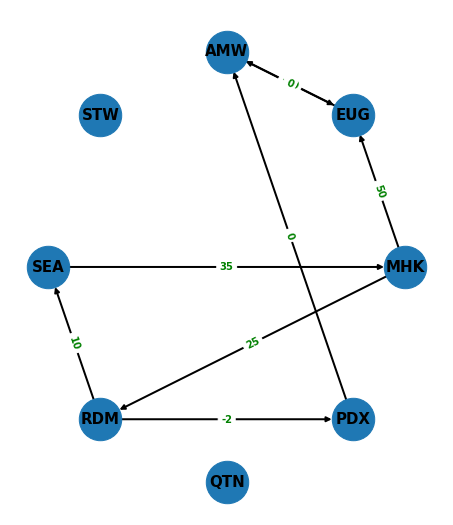

In [9]:
## this seems for python: spark.sparkContext.addPyFile(abc.jar)
spark.sparkContext.addPyFile('/Users/zhuohuawu/Documents/zw_progs/graphframes/graphframes-0.8.1-spark3.0-s_2.12.jar')

from graphframes import GraphFrame
from graphframes.examples import *
# from graphframes.examples import Graphs

vertices = spark.createDataFrame([("MHK", "Manhattan", 103),
                                  ("EUG", "Eugene", 65),
                                  ("AMW", "Ames", 35),
                                  ("STW", "Stowe", 2),
                                  ("SEA", "Seattle", 10),
                                  ("RDM", "Bend", 70),
                                  ("QTN", "Queenstown", 1),
                                  ("PDX", "Portland", 3)], ["airport_id", "airport_name", "total_flights"])
# vertices.show(10, False)

edges = spark.createDataFrame([("MHK", "EUG", 50),
                               ("EUG", "AMW", -10),
                               ("AMW", "EUG", 0),
                               ("PDX", "AMW", 0),
                               ("RDM", "PDX", -2),
                               ("RDM", "SEA", 10),
                               ("SEA", "MHK", 35),
                               ("MHK", "RDM", 25)], ["src", "dst", "delay"])

## step 1: # Below will show an error because in vertices id column should be there but in our case it is airport_id.
## Same like this in edges "src" and "dst" column should be there
## flights_route = GraphFrame(vertices, edges)

## step 2: rename vertices as id and construct graphframe
vertices = vertices.withColumnRenamed("airport_id", "id")
flight_routes = GraphFrame(vertices, edges)

## step 3: show vertices, edges, inDegrees
print("flight_routes: vertices: ")
flight_routes.vertices.show(10, False)

print("flight_routes: edges: ")
flight_routes.edges.show(10, False)

## select src and dst pair
flight_routes.edges.select("src", "dst").show()
plot_directed_graph(flight_routes)